<a href="https://colab.research.google.com/github/Manwi23/Hello-Darkness/blob/main/whitebalancestuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14
!pip install rawpy
!pip install scipy==1.2.0

     |████████████████████████████████| 109.3MB 80kB/s 
     |████████████████████████████████| 491kB 25.7MB/s 
     |████████████████████████████████| 3.2MB 29.7MB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 1.7MB 5.1MB/s 
     |████████████████████████████████| 26.6MB 1.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [2]:
import tensorflow.contrib

import matplotlib.pyplot as plt
import rawpy
import os

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
!git clone https://github.com/cchen156/Learning-to-See-in-the-Dark.git

Cloning into 'Learning-to-See-in-the-Dark'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 471.42 KiB | 7.73 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [4]:
%cd Learning-to-See-in-the-Dark/
!python download_models.py

/content/Learning-to-See-in-the-Dark
Dowloading Sony Model (84Mb)
Dowloading Fuji Model (84Mb)


In [5]:
!cd dataset && wget https://storage.googleapis.com/isl-datasets/SID/Sony.zip

--2021-05-20 17:12:33--  https://storage.googleapis.com/isl-datasets/SID/Sony.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26926662016 (25G) [application/zip]
Saving to: ‘Sony.zip’

Sony.zip            100%[===================>]  25.08G  45.6MB/s    in 7m 7s   

2021-05-20 17:19:41 (60.1 MB/s) - ‘Sony.zip’ saved [26926662016/26926662016]



In [6]:
# %cd Learning-to-See-in-the-Dark/
# !python test_Sony.py 

In [7]:
# !cd Learning-to-See-in-the-Dark && ls

In [8]:
# !ls

In [9]:
# !cd result_Sony && cd final && ls

In [10]:
# !cd dataset && unzip -l Sony.zip >> conts

In [11]:
def unzip_only(n, testset_only=True):
    cmd = "cd dataset && unzip -l Sony.zip"
    out = os.popen(cmd).read()
    cmd = "cd dataset && cat Sony_test_list.txt"
    l = os.popen(cmd).read()

    in_testset_long = []
    in_testset_short = []

    for line in l.split('\n'):
        sp = line.split(' ')
        if len(sp) > 1:
            lo = sp[1].split('/')[3]
            sh = sp[0].split('/')[3]
            in_testset_long += [lo]
            in_testset_short += [sh]

    needed = []
    cnt = 0

    cmd = "cd dataset && mkdir Sony"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir short"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir long"
    os.system(cmd)

    eee = 0

    # print(in_testset_long)

    for line in out.split('\n'):
        # print("ok", len(needed), cnt)
        sp = line.split('/')
        if len(sp) > 1:
            ph = sp[-1]
            doing = True
            if ph and (ph in needed or cnt < n):
                if ph[0] == '1':
                    print(ph, ph in needed, ph in in_testset_short, ph in in_testset_long, line)
                if ph not in needed:
                    cnt += 1
                    if 'short' in line:
                        ind = in_testset_short.index(ph) if ph in in_testset_short else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_long[ind]]
                    else:
                        ind = in_testset_long.index(ph) if ph in in_testset_long else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_short[ind]]
                else:
                    needed.remove(ph)
                if doing:
                    path = ''
                    if 'short' in line:
                        path = 'Sony/short/' + ph
                    else:
                        path = 'Sony/long/' + ph
                    cmd = "cd dataset && unzip -p Sony.zip " + path + " > " + path
                    os.system(cmd)
            elif cnt >= n and len(needed) < 1:
                break

In [12]:
unzip_only(5)

10003_00_10s.ARW False False True  25690112  2017-11-05 20:07   Sony/long/10003_00_10s.ARW
10006_00_10s.ARW False False True  25198592  2017-11-05 20:23   Sony/long/10006_00_10s.ARW
10011_00_10s.ARW False False True  24969216  2017-11-05 20:54   Sony/long/10011_00_10s.ARW
10016_00_10s.ARW False False True  25427968  2017-11-05 21:17   Sony/long/10016_00_10s.ARW
10022_00_10s.ARW False False True  25362432  2017-11-05 22:30   Sony/long/10022_00_10s.ARW
10003_00_0.04s.ARW True True False  24641536  2017-11-05 20:09   Sony/short/10003_00_0.04s.ARW
10006_00_0.04s.ARW True True False  24641536  2017-11-05 20:24   Sony/short/10006_00_0.04s.ARW
10011_00_0.04s.ARW True True False  24608768  2017-11-05 20:55   Sony/short/10011_00_0.04s.ARW
10016_00_0.04s.ARW True True False  24641536  2017-11-05 21:18   Sony/short/10016_00_0.04s.ARW
10022_00_0.04s.ARW True True False  24641536  2017-11-05 22:32   Sony/short/10022_00_0.04s.ARW


In [13]:
# %cd Learning-to-See-in-the-Dark

In [14]:
!cd dataset && cd Sony && cd long && ls

10003_00_10s.ARW  10011_00_10s.ARW  10022_00_10s.ARW
10006_00_10s.ARW  10016_00_10s.ARW


In [15]:
!cd dataset && cd Sony && cd short && ls

10003_00_0.04s.ARW  10011_00_0.04s.ARW	10022_00_0.04s.ARW
10006_00_0.04s.ARW  10016_00_0.04s.ARW


In [16]:
# !cd dataset && cd Sony && rm -r long

In [17]:
!python test_Sony.py 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [60]:
def plot_k_model_outputs(k=3, fig_x=20, fig_y=10):
    img_list = os.listdir("result_Sony/final")
    img_list.sort()
    model_path = "result_Sony/final/"
    short_img = 'dataset/Sony/short/'
    fig, axes = plt.subplots(nrows=k, ncols=4, figsize=(fig_x, fig_y))
    [axi.set_axis_off() for axi in axes.ravel()]
    axes[0][0].title.set_text('Short exposure')
    axes[0][1].title.set_text('Long exposure')
    axes[0][2].title.set_text('Model output')
    axes[0][3].title.set_text('Scaled output')
    for i in range(k):
        name = img_list[i*3][:-10]
        gt_raw = rawpy.imread(short_img+name+'0.04s.ARW')
        im = gt_raw.postprocess()
        axes[i][0].imshow(im)
        img = plt.imread(model_path+img_list[i*3])
        axes[i][1].imshow(img)
        img = plt.imread(model_path+img_list[i*3+1])
        axes[i][2].imshow(img)
        img = plt.imread(model_path+img_list[i*3+2])
        axes[i][3].imshow(img)

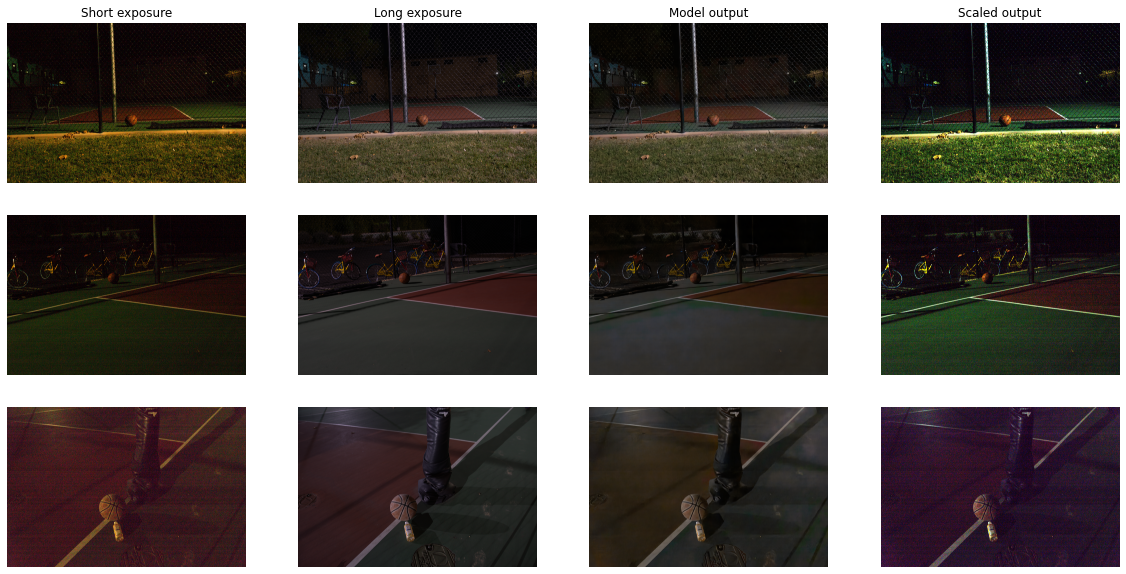

In [61]:
plot_k_model_outputs(k=3)

In [20]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as ttf
import torchvision
from torch import nn
from torch.autograd import Variable

import random

import numpy as np

In [21]:
CUDA = False

In [22]:
def preprocess(image, ground_truth):
    s = image.shape
    if len(s) == 3 and s[2] == 4:
        image = image.permute(2, 0, 1)
        ground_truth = ground_truth.permute(2, 0, 1)

    i, j, h, w = torchvision.transforms.RandomCrop.get_params(image, output_size=(512, 512))
    image = ttf.crop(image, i, j, h, w)
    ground_truth = ttf.crop(ground_truth, i, j, h, w)

    if random.random() > 0.5:
        image = ttf.hflip(image)
        ground_truth = ttf.hflip(ground_truth)

    if random.random() > 0.5:
        image = ttf.vflip(image)
        ground_truth = ttf.vflip(ground_truth)

    image = torch.tensor(image)
    ground_truth = torch.tensor(ground_truth)

    return image, ground_truth

In [39]:
def pack_raw(raw):

    # pack Bayer image to 4 channels & subtract black level
    im = raw.raw_image_visible.astype(np.float32)
    im = np.maximum(im - 512, 0) / (16383 - 512)  # subtract the black level
    ## ja się chętnie pewnego dnia dowiem po co jest to dzielenie

    im = np.expand_dims(im, axis=2)
    img_shape = im.shape
    H = img_shape[0]
    W = img_shape[1]

    out = np.concatenate((im[0:H:2, 0:W:2, :],
                          im[0:H:2, 1:W:2, :],
                          im[1:H:2, 1:W:2, :],
                          im[1:H:2, 0:W:2, :]), axis=2)
    
    return torch.tensor(out)

In [40]:
ex_short = 'dataset/Sony/short/'+'10003_00_'+'0.04s.ARW'
ex_long = 'dataset/Sony/long/'+'10003_00_'+'10s.ARW'

In [41]:
gt_raw = rawpy.imread(ex_short)
out = pack_raw(gt_raw)
# print(gt_raw.sizes)
# im = gt_raw.postprocess()
# plt.imshow(im)
print(out.shape)

torch.Size([1424, 2128, 4])


In [26]:
gt_raw = rawpy.imread(ex_long)
out = pack_raw(gt_raw)
print(out.shape)

torch.Size([1424, 2128, 4])


In [63]:
img_short = rawpy.imread(ex_short)
img_long = rawpy.imread(ex_long)
img_short_packed, img_long_packed = pack_raw(img_short), pack_raw(img_long)
img_short_pre, img_long_pre = preprocess(img_short_packed, img_long_packed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [64]:
# plt.imshow(img_short)

In [65]:
# plt.imshow(img_long)

In [66]:
!cd result_Sony/final/ && ls

10003_00_250_gt.png	10006_00_250_scale.png	10016_00_250_out.png
10003_00_250_out.png	10011_00_250_gt.png	10016_00_250_scale.png
10003_00_250_scale.png	10011_00_250_out.png	10022_00_250_gt.png
10006_00_250_gt.png	10011_00_250_scale.png	10022_00_250_out.png
10006_00_250_out.png	10016_00_250_gt.png	10022_00_250_scale.png


In [67]:
def get_amplification_ratio(img_path, gt_path):
    img_base = os.path.basename(img_path)
    gt_base = os.path.basename(gt_path)
    img_time = float(img_base[9:-5])
    gt_time = float(gt_base[9:-5])
    return gt_time / img_time


In [68]:
get_amplification_ratio(ex_short, ex_long)

250.0

In [86]:
def white_balance(image, ground_truth):
    image = torch.tensor(image.postprocess().astype(np.float32))
    # print(image.shape)
    ground_truth = torch.tensor(ground_truth.postprocess().astype(np.float32))
    mi = torch.mean(image, dim=(0,1), keepdims=True)
    mg = torch.mean(ground_truth, dim=(0,1), keepdims=True)
    image = torch.clip(image * (mg / mi), 0, 1)
    print(mg, mi)
    return image

In [87]:
imga = white_balance(img_short, img_long)

tensor([[[75.3867, 50.0534, 15.6695]]]) tensor([[[38.7319, 29.2581,  9.5714]]])


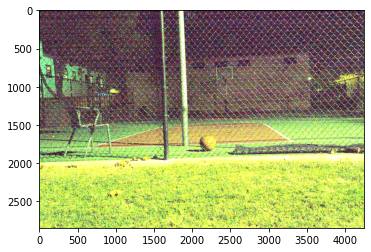

In [88]:
plt.imshow(imga)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


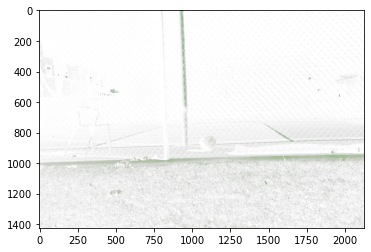

In [54]:
plt.imshow(img)